### Homework 3

**1.** For a constant $c$, show that $E[(s-c)^2] = (c-E[s])^2 + Var[s]$. (2 points)

Solution:
We know that $Var[X] = E[X^2] - (E[X])^2$. <br>
We can use this by considering $E[X^2] = Var[X] + (E[X])^2$.

First, we can expand the left-hand side:
$$
E[(s-c)^2] = E[s^2 - 2sc + c^2] = E[s^2] - 2cE[s] + c^2
$$
(we can drop the Expectation for c since it is a constant). <br><br>
Now, we can substitute $E[s^2]$ with $Var[s] + (E[s])^2$:
$$
E[(s-c)^2] = Var[s] + (E[s])^2 - 2cE[s] + c^2
$$
Now we can rearrange the equation and contract the terms:
$$
E[(s-c)^2] = (E[s]-c)^2 + Var[s]
$$
Because $x^2=(-x)^2$, we can switch the order of the terms in the square:
$$
E[(s-c)^2] = (c-E[s])^2 + Var[s]
$$
<br><br>

**2.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

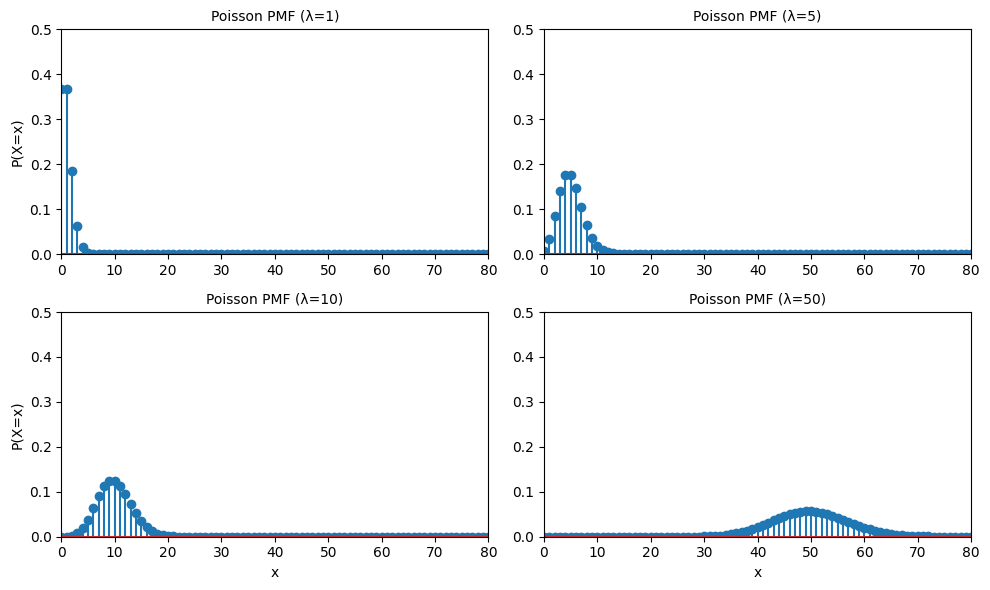

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
# Parameters
lambdas = [1, 5, 10, 50]
x = np.arange(0, 100)
# Create a figure and axis
fig, ax = plt.subplots(2,2,figsize=(10, 6), tight_layout=True)
ax = ax.flatten()

# Define colors for each lambda
cd = {1: 'b', 5: 'g', 10: 'r', 50: 'm'}

# Plot the p.m.f. for each lambda
for i, lam in enumerate(lambdas):
    pmf = poisson.pmf(x, lam)
    ax[i].stem(x, pmf, label=f'λ={lam}')#, color=cd[lam])
    ax[i].set_ylim(0, 0.5)
    ax[i].set_title(f'Poisson PMF (λ={lam})', fontsize=10)
    ax[i].set_xlim(0, 80)
# Set the title and labels
ax[0].set_ylabel('P(X=x)')
ax[2].set_xlabel('x')
ax[2].set_ylabel('P(X=x)')
ax[3].set_xlabel('x')
# Show the plot
plt.show()

As $\lambda$ increases, the shape of the p.m.f. approaches a normal distribution.
The variance of a Posson distribution is also $\lambda$, so it is equal to the mean (Fano-Factor = 1).
With larger $\lambda$, the spread of the distribution increases, and the p.m.f. becomes more symmetric and bell-shaped.

Text(0.5, 0, 'x')

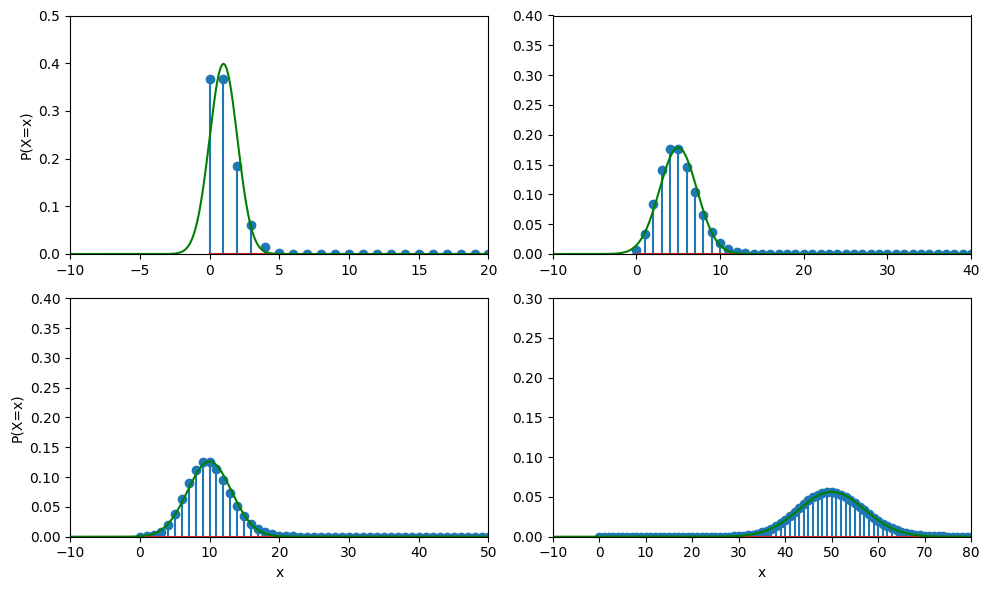

In [55]:

fig, ax = plt.subplots(2,2, figsize=(10, 6), tight_layout=True)
ax = ax.flatten()
# Plot the p.m.f. for each lambda and the corresponding normal distribution
x = np.arange(0, 100)
x_normal = np.linspace(-10, 100, 1000)
for i,lam in enumerate(lambdas):
    pmf = poisson.pmf(x, lam)
    # Normal approximation
    mu = lam
    sigma = np.sqrt(lam)
    normal_pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_normal - mu) / sigma) ** 2)
    
    # Plot the Poisson PMF
    ax[i].stem(x, pmf, label=f'λ={lam}')
    
    # Plot the Normal distribution
    ax[i].plot(x_normal, normal_pdf, label=f'Normal Approx. λ={lam}', color='green')
ax[0].set_xlim(-10, 20)
ax[1].set_xlim(-10, 40)
ax[2].set_xlim(-10, 50)
ax[3].set_xlim(-10, 80)
ax[0].set_ylim(0, 0.5)
ax[1].set_ylim(0, 0.4)
ax[2].set_ylim(0, 0.4)
ax[3].set_ylim(0, 0.3)
ax[0].set_ylabel('P(X=x)')
ax[2].set_xlabel('x')
ax[2].set_ylabel('P(X=x)')
ax[3].set_xlabel('x')
# Set the title and labels  


The optimal parameters must be such that mean and variance are equal to $\lambda$.
For a Gaussian parametrzed by mean $\mu$ and std $\sigma$, the mean is $\mu = \lambda$ and the std is $\sigma = \sqrt{\lambda}$.

**3. Noise models**

Assume a tuning curve $f(s)$ with stimulus angle $s \in [-\pi, \pi]$:
$$f(s) = \begin{cases}
    - f_{max} \tfrac4{\pi^2} (s-\tfrac\pi2) (s + \tfrac\pi2) &\quad s \in [-\tfrac\pi2, \tfrac\pi2]\\
    0 &\quad else
\end{cases} $$
In each subtask the firing rate $r$ is given by a different noise model. For a discreticed interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)

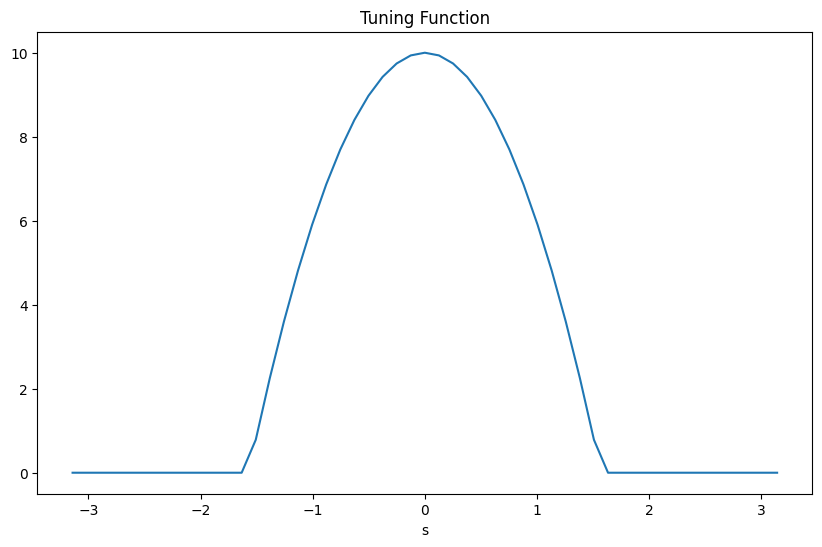

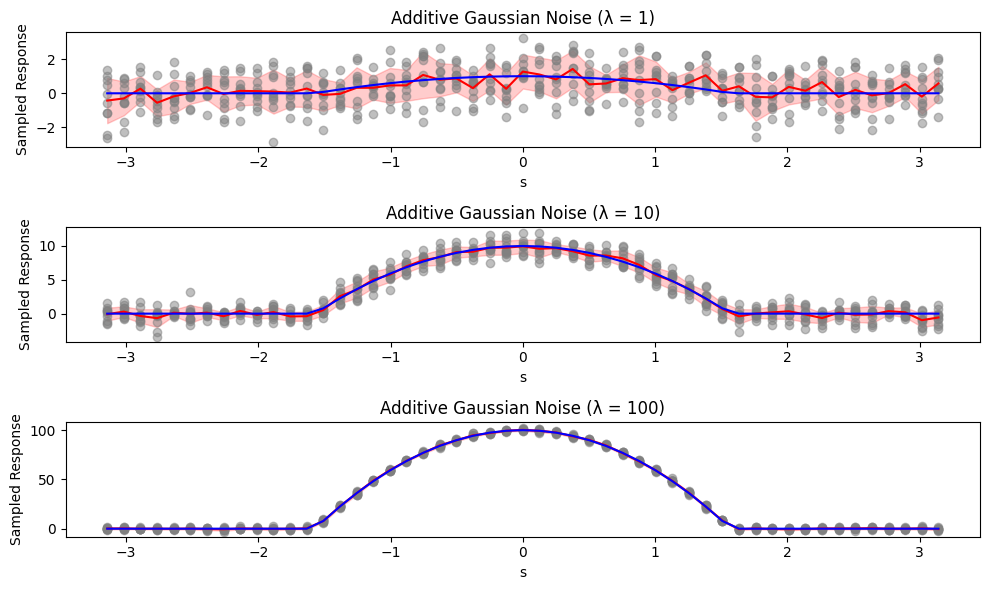

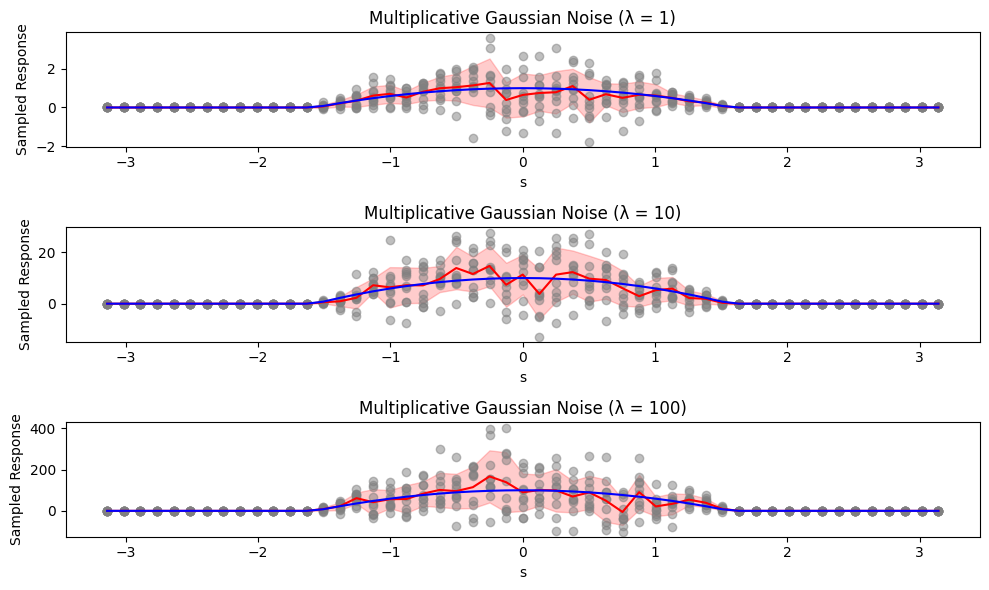

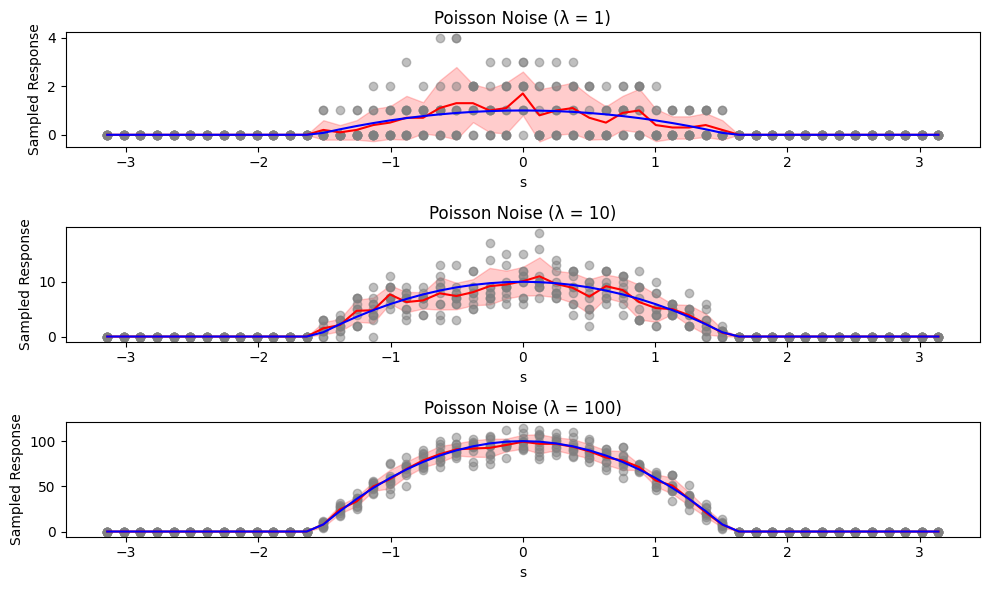

In [69]:
from scipy.special import comb

f_max_list = [1, 10, 100]
s_interval = np.linspace(-np.pi, np.pi, 51, endpoint=True)
n_samples = 10

def tuning_function(s, f_max):
    condition = (-np.pi/2 < s) & (s < np.pi/2)
    return np.where(condition, 
                   -f_max * 4/(np.pi**2) * (s-np.pi/2)*(s+np.pi/2), 
                   0)
    

#plot the true tuning function
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Tuning Function')
ex_f_max = 10
ax.plot(s_interval, tuning_function(s_interval, ex_f_max), label=f'λ = {ex_f_max}')
ax.set_xlabel('s')

#function to sample from the tuning function with a given noise function
def sample_tuning_function(stimuli, tuning_func, f_max, noise_func, n_samples):
    """
    Parameters
    ----------
    stimuli : array (n_stimuli,)
        The stimuli to sample from.
    tuning_func : function
        The tuning function to sample from.
    f_max : float
        The maximum value of the tuning function.
    noise_func : function
        The noise function to sample from.
    n_samples : int
        The number of samples to generate.
    Returns
    -------
    samples : array (n_stimuli, n_samples)
        The generated samples.
    mean : array (n_stimuli,) 
        The mean of the generated samples.
    std : array (n_stimuli,)
        The standard deviation of the generated samples.
    """

    # Generate the samples
    samples = np.zeros((len(stimuli), n_samples))
    for i, stimulus in enumerate(stimuli):
        response = tuning_func(stimulus, f_max)
        for j in range(n_samples):
            samples[i, j] = noise_func(response)
    # Calculate the mean and standard deviation
    mean = np.mean(samples, axis=1)
    std = np.std(samples, axis=1)
    return samples, mean, std

# Define the noise function
def gaus_add_noise_function(x):
    return x + np.random.normal(0, 1, size=x.shape)

def gaus_mult_noise_function(x):
    return np.random.normal(x, x, size=x.shape)

def poisson_noise_function(x):
    return np.random.poisson(x)

def neg_binomial_noise_function(x):
    q = x
    if x == 0 or q == 0:
        return 0
    p = x / (x + q)
    q_int = int(np.round(q))
    return #TODO

#### Additive Gaussian Noise
fig, ax = plt.subplots(3,1,figsize=(10, 6), tight_layout=True)
ax = ax.flatten()
for i, f_max in enumerate(f_max_list):
    # Sample from the tuning function with noise
    samples, mean, std = sample_tuning_function(s_interval, tuning_function, f_max, gaus_add_noise_function, n_samples)
    ax[i].set_title(f'Additive Gaussian Noise (λ = {f_max})')
    for j in range(samples.shape[0]):
        ax[i].plot(np.repeat(s_interval[j], n_samples), samples[j, :], 'o', alpha=0.5, color='gray')
    ax[i].plot(s_interval, mean, label='Mean', color='red')
    ax[i].plot(s_interval, tuning_function(s_interval, f_max), label='True Tuning Function', color='blue')
    ax[i].fill_between(s_interval, mean-std, mean+std, color='red', alpha=0.2)
    ax[i].set_xlabel('s')
    ax[i].set_ylabel('Sampled Response')


### Multiplicative Gaussian Noise
fig, ax = plt.subplots(3,1,figsize=(10, 6), tight_layout=True)
ax = ax.flatten()
for i, f_max in enumerate(f_max_list):
    # Sample from the tuning function with noise
    samples, mean, std = sample_tuning_function(s_interval, tuning_function, f_max, gaus_mult_noise_function, n_samples)
    ax[i].set_title(f'Multiplicative Gaussian Noise (λ = {f_max})')
    for j in range(samples.shape[0]):
        ax[i].plot(np.repeat(s_interval[j], n_samples), samples[j, :], 'o', alpha=0.5, color='gray')
    ax[i].plot(s_interval, mean, label='Mean', color='red')
    ax[i].plot(s_interval, tuning_function(s_interval, f_max), label='True Tuning Function', color='blue')
    ax[i].fill_between(s_interval, mean-std, mean+std, color='red', alpha=0.2)
    ax[i].set_xlabel('s')
    ax[i].set_ylabel('Sampled Response')

### Poisson Noise
fig, ax = plt.subplots(3,1,figsize=(10, 6), tight_layout=True)
ax = ax.flatten()
for i, f_max in enumerate(f_max_list):
    # Sample from the tuning function with noise
    samples, mean, std = sample_tuning_function(s_interval, tuning_function, f_max, poisson_noise_function, n_samples)
    ax[i].set_title(f'Poisson Noise (λ = {f_max})')
    for j in range(samples.shape[0]):
        ax[i].plot(np.repeat(s_interval[j], n_samples), samples[j, :], 'o', alpha=0.5, color='gray')
    ax[i].plot(s_interval, mean, label='Mean', color='red')
    ax[i].plot(s_interval, tuning_function(s_interval, f_max), label='True Tuning Function', color='blue')
    ax[i].fill_between(s_interval, mean-std, mean+std, color='red', alpha=0.2)
    ax[i].set_xlabel('s')
    ax[i].set_ylabel('Sampled Response')


### Negative Binomial Noise
# fig, ax = plt.subplots(3,1,figsize=(10, 6), tight_layout=True)
# ax = ax.flatten()
# for i, f_max in enumerate(f_max_list):
#     # Sample from the tuning function with noise
#     samples, mean, std = sample_tuning_function(s_interval, tuning_function, f_max, neg_binomial_noise_function, n_samples)
#     ax[i].set_title(f'Negative Binomial Noise (λ = {f_max})')
#     for j in range(samples.shape[0]):
#         ax[i].plot(np.repeat(s_interval[j], n_samples), samples[j, :], 'o', alpha=0.5, color='gray')
#     ax[i].plot(s_interval, mean, label='Mean', color='red')
#     ax[i].plot(s_interval, tuning_function(s_interval, f_max), label='True Tuning Function', color='blue')
#     ax[i].fill_between(s_interval, mean-std, mean+std, color='red', alpha=0.2)
#     ax[i].set_xlabel('s')
#     ax[i].set_ylabel('Sampled Response')
